In [1]:
!pip install bing-image-downloader

In [35]:
!pip install pyngrok

In [3]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.5 MB/s eta 0:00:00


In [4]:
import os
import requests

import mlflow
import mlflow.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNet

from datetime import datetime
import matplotlib.pyplot as plt

from bing_image_downloader import downloader
from pathlib import Path
import imghdr

In [12]:
image_path = "/content/sample_data/cat_dogs1/"

In [13]:
def download_images(query, limit, output_dir):

    downloader.download(query,
                        limit=limit,
                        output_dir=output_dir,
                        adult_filter_off=True,
                        force_replace=False,
                        timeout=60)

download_images("cat", 200, image_path)
download_images("dog", 200, image_path)

[%] Downloading Images to /content/sample_data/cat_dogs1/cat


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://news.uoguelph.ca/wp-content/uploads/2016/11/cat-e1478099247797.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://upload.wikimedia.org/wikipedia/commons/d/d4/Cat_March_2010-1a.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.thesprucepets.com/thmb/b2yNmEfOPAk7SiCXO9h-2M0t22E=/2121x1414/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-1139569345-49bf1b7201a743d389c824afd5aeb4d6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://3.bp.blogspot.com/-8sZkKWu98rE/UiD3w_ilIuI/AAAAAAAAAUc/ywb03PKeRtA/s1600/cat-funny.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://3.bp.blogspot.com/-7ABAaAViPyw/W84wG4scmQI/AAAAAAAAFUU/7jbp2CidXKYRRH81GIFOeEa7-D3GabJqgCLcBGAs/s1600/cat.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.toledoblade.com/image/2014/0

In [14]:
for category in ["cat","dog"]:
    data_dir = os.path.join(image_path, category)
    image_extensions = [".png", ".jpg"]  # add there all your images file extensions

    img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
    for filepath in Path(data_dir).rglob("*"):
        if filepath.suffix.lower() in image_extensions:
            img_type = imghdr.what(filepath)
            if img_type is None:
                print(f"{filepath} is not an image")
            elif img_type not in img_type_accepted_by_tf:
                print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/sample_data/cat_dogs1/dog/Image_63.jpg is a webp, not accepted by TensorFlow


In [15]:
learning_rate = 0.01
num_epochs = 50
batch_size = 32
input_shape = (224, 224, 3)

In [16]:
experiment_name = "cat-dog-classifier-mobilenet"
run_name = datetime.now().strftime("%Y%m%d_%H%M%S")

In [21]:
train_dataset = keras.preprocessing.image_dataset_from_directory(
    image_path,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=input_shape[:2],
    batch_size=batch_size,
)

Found 119 files belonging to 2 classes.
Using 96 files for training.


In [22]:
val_dataset = keras.preprocessing.image_dataset_from_directory(
    image_path,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=input_shape[:2],
    batch_size=batch_size,
)

Found 119 files belonging to 2 classes.
Using 23 files for validation.


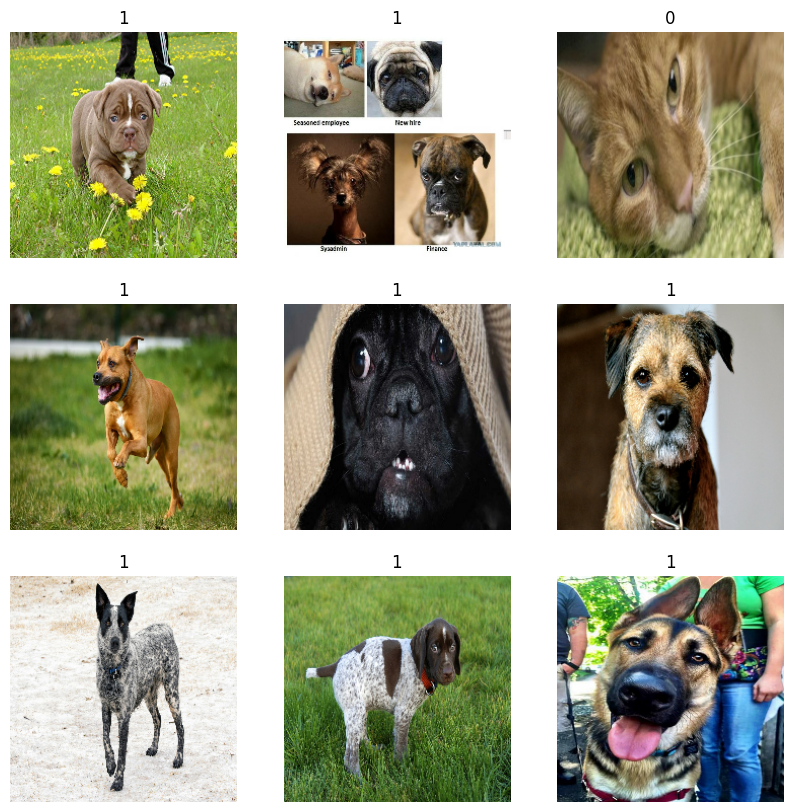

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

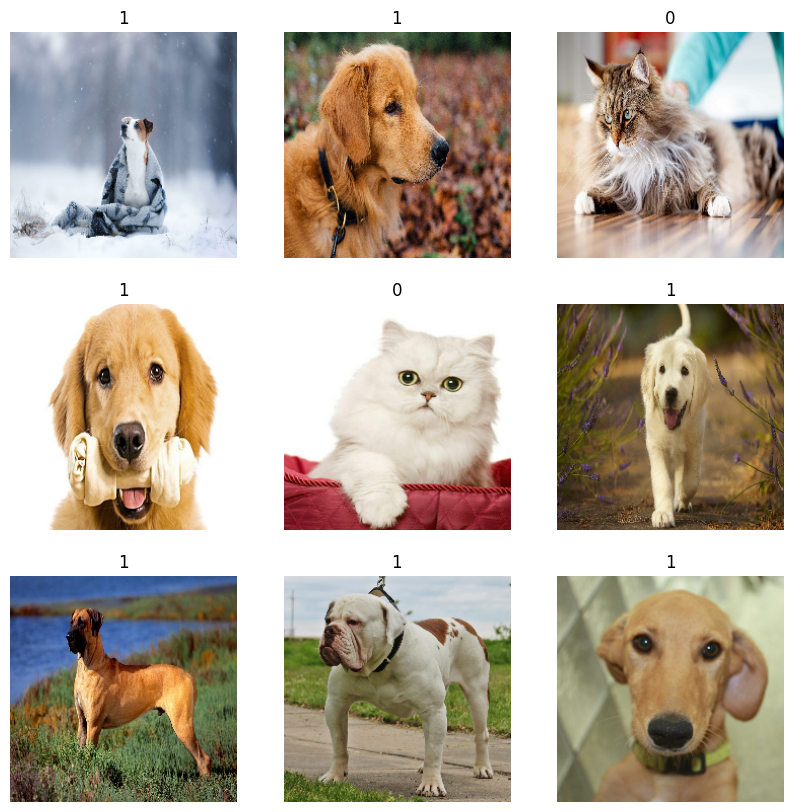

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in val_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [25]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

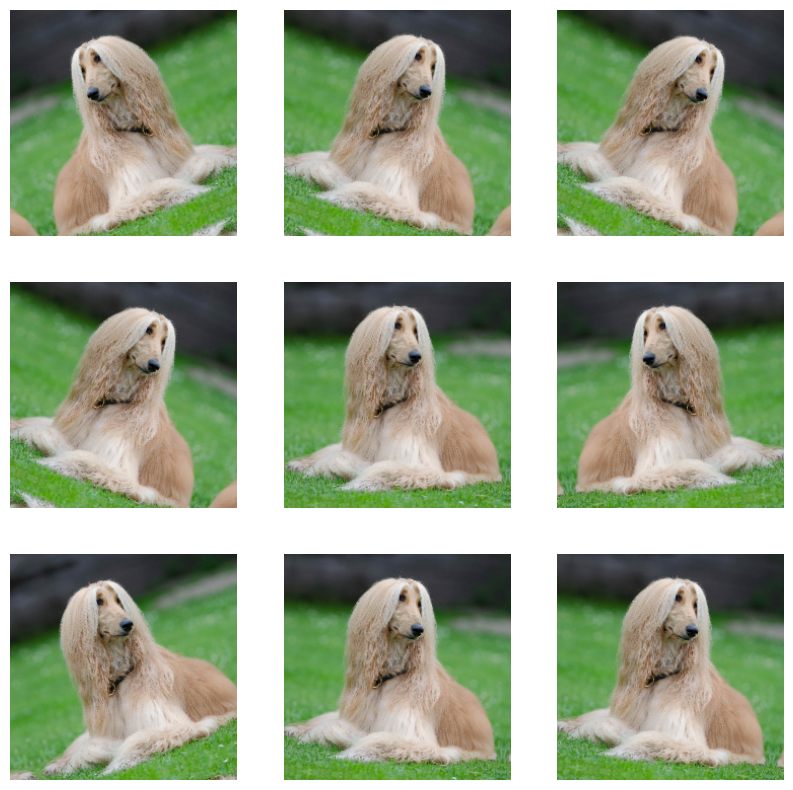

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [32]:
augmented_train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [27]:
# Define the base model and add a classifier on top
base_model = MobileNet(input_shape=input_shape, include_top=False, weights="imagenet")
base_model.trainable = False
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

17225924/17225924 [==============================] - 0s 0us/step


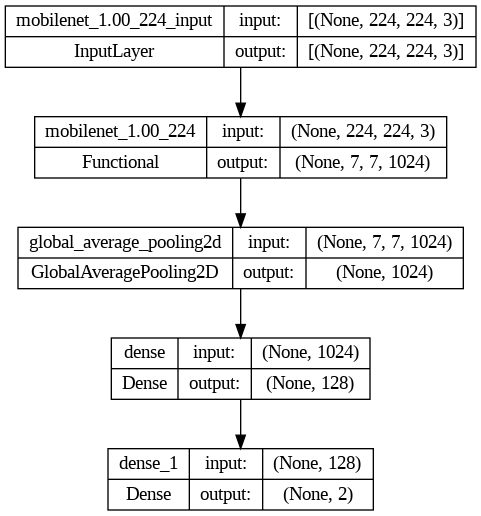

In [28]:
keras.utils.plot_model(model, show_shapes=True)

In [29]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=["accuracy"],
)

In [30]:
logdir = os.path.join("logs", experiment_name, run_name)
tb_callback = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=True, histogram_freq=1)

In [33]:
history = model.fit(
    augmented_train_dataset,
    epochs=num_epochs,
    validation_data=val_dataset,
    verbose=2,
    callbacks=[tb_callback]
)

Epoch 1/50
3/3 - 14s - loss: 6.1852 - accuracy: 0.7083 - val_loss: 7.1403 - val_accuracy: 0.3043 - 14s/epoch - 5s/step
Epoch 2/50
3/3 - 11s - loss: 5.6252 - accuracy: 0.2812 - val_loss: 0.8839 - val_accuracy: 0.4348 - 11s/epoch - 4s/step
Epoch 3/50
3/3 - 10s - loss: 1.6082 - accuracy: 0.6042 - val_loss: 2.5093 - val_accuracy: 0.6957 - 10s/epoch - 3s/step
Epoch 4/50
3/3 - 11s - loss: 2.2050 - accuracy: 0.7188 - val_loss: 1.5254 - val_accuracy: 0.6957 - 11s/epoch - 4s/step
Epoch 5/50
3/3 - 10s - loss: 0.9818 - accuracy: 0.7188 - val_loss: 1.0379 - val_accuracy: 0.3043 - 10s/epoch - 3s/step
Epoch 6/50
3/3 - 10s - loss: 1.0961 - accuracy: 0.2812 - val_loss: 0.6381 - val_accuracy: 0.6087 - 10s/epoch - 3s/step
Epoch 7/50
3/3 - 10s - loss: 0.4954 - accuracy: 0.7708 - val_loss: 0.6459 - val_accuracy: 0.6957 - 10s/epoch - 3s/step
Epoch 8/50
3/3 - 10s - loss: 0.6163 - accuracy: 0.7292 - val_loss: 0.5395 - val_accuracy: 0.7391 - 10s/epoch - 3s/step
Epoch 9/50
3/3 - 10s - loss: 0.4545 - accuracy: 

In [38]:
# Set the experiment name and create an MLflow run
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name = run_name) as mlflow_run:

    mlflow.set_experiment_tag("base_model", "MobileNet")
    mlflow.set_tag("optimizer", "keras.optimizers.Adam")
    mlflow.set_tag("loss", "sparse_categorical_crossentropy")

    mlflow.keras.log_model(model, "model")

    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("num_epochs", num_epochs)
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("input_shape", input_shape)

    mlflow.log_metric("train_loss", history.history["loss"][-1])
    mlflow.log_metric("train_acc", history.history["accuracy"][-1])
    mlflow.log_metric("val_loss", history.history["val_loss"][-1])
    mlflow.log_metric("val_acc", history.history["val_accuracy"][-1])

    mlflow.log_artifact("model.png", "model_plot")

    mlflow_run_id = mlflow_run.info.run_id
    print("MLFlow Run ID: ", mlflow_run_id)
get_ipython().system_raw("mlflow ui --port 5000 &")
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2dGtqfzKayPR785xvhA6uECTx9b_2QKUww2PfpjLYhmYhjbsK"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

2024/03/05 13:50:24 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


MLFlow Run ID:  95e83b2ac9f04b6690e92985a5c2714d
MLflow Tracking UI: https://97f8-34-74-58-97.ngrok-free.app


In [42]:
img = keras.preprocessing.image.load_img(
    os.path.join(image_path, "cat/Image_17.jpg"), target_size=input_shape
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

1/1 [==============================] - 1s 1s/step
This image is 99.99% cat and 0.01% dog.


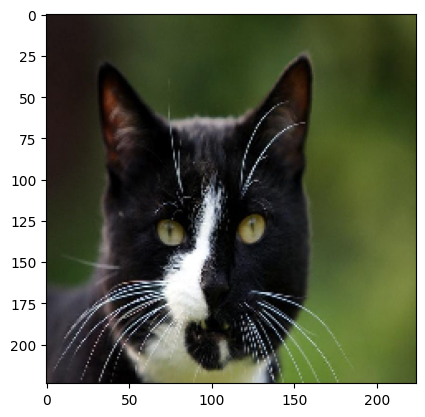

In [43]:
predictions = model.predict(img_array)
print("This image is {:.2f}% cat and {:.2f}% dog.".format(100 * float(predictions[0][0]),
                                                          100 * float(predictions[0][1])))

plt.imshow(img_array[0].numpy().astype("uint8"))

In [44]:
logged_model_path = f"runs:/{mlflow_run_id}/model"

# Load model as a Keras model
loaded_model = mlflow.keras.load_model(logged_model_path)

1/1 [==============================] - 1s 1s/step
This image is 99.99% cat and 0.01% dog.


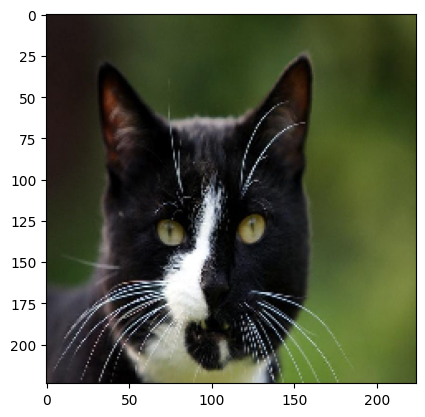

In [45]:
predictions = loaded_model.predict(img_array)
print("This image is {:.2f}% cat and {:.2f}% dog.".format(100 * float(predictions[0][0]),
                                                          100 * float(predictions[0][1])))

plt.imshow(img_array[0].numpy().astype("uint8"))

In [46]:
logged_model_path


'runs:/95e83b2ac9f04b6690e92985a5c2714d/model'

Setting model in model registry

In [47]:
model_name = "cat_dog_classifier"
model_version = 1

In [48]:
print("MLFlow Run ID: ", mlflow_run_id)

MLFlow Run ID:  95e83b2ac9f04b6690e92985a5c2714d


In [49]:
with mlflow.start_run(run_id=mlflow_run_id) as run:
    result = mlflow.register_model(
        logged_model_path,
        model_name
    )

Successfully registered model 'cat_dog_classifier'.
Created version '1' of model 'cat_dog_classifier'.


1/1 [==============================] - 1s 1s/step
This image is 99.99% cat and 0.01% dog.


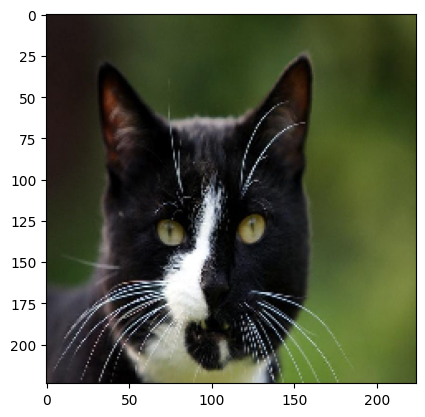

In [50]:
loaded_model = mlflow.keras.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

predictions = loaded_model.predict(img_array)
print("This image is {:.2f}% cat and {:.2f}% dog.".format(100 * float(predictions[0][0]),
                                                          100 * float(predictions[0][1])))

plt.imshow(img_array[0].numpy().astype("uint8"))

Model to Production

In [51]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage="Production"
)

<ipython-input-51-439beab08549>:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.0/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1709648363791, current_stage='Production', description=None, last_updated_timestamp=1709649428321, name='cat_dog_classifier', run_id='95e83b2ac9f04b6690e92985a5c2714d', run_link=None, source='file:///content/mlruns/313958231643402820/95e83b2ac9f04b6690e92985a5c2714d/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

/usr/local/lib/python3.10/dist-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.11.0/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


1/1 [==============================] - 2s 2s/step
This image is 99.99% cat and 0.01% dog.


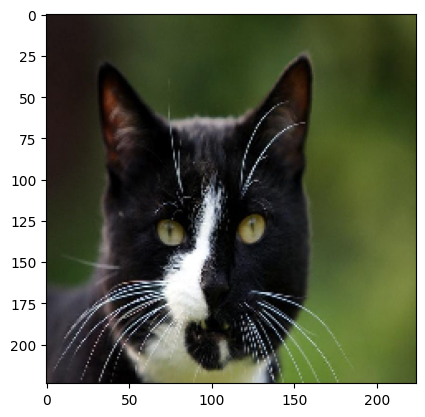

In [52]:
# Load model as a Keras model
loaded_model = mlflow.keras.load_model(
    model_uri=f"models:/{model_name}/production"
)

predictions = loaded_model.predict(img_array)
print("This image is {:.2f}% cat and {:.2f}% dog.".format(100 * float(predictions[0][0]),
                                                          100 * float(predictions[0][1])))

plt.imshow(img_array[0].numpy().astype("uint8"))